In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
from pathlib import Path
import cmocean as cmo
import numpy as np

In [7]:
# Function to load ONE file
def load_files(filepath: str | Path) -> pd.DataFrame:
    """
    Read an SBE text export that has metadata lines before the real header.
    Returns a tidy DataFrame with an extra 'datetime' column.
    """
    filepath = Path(filepath)

    # detect how many metadata lines to skip ------------------
    with filepath.open('r', encoding='latin1') as f:
        for i, line in enumerate(f):
            if line.strip().startswith("Date") and "Time" in line:
                skiprows = i
                break

    # read the rest ------------------------------------------
    df = pd.read_csv(
        filepath,
        sep=r'\s+',                 # whitespace delimiter
        skiprows=skiprows,          # jump over metadata
        encoding='latin1'
    )

    # combine date/time to real datetime ----------------------
    df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df['source']   = filepath.stem   # keep the filename → handy for legends
    df = df.iloc[1:]                # drop the first data row
    return df


# 2.  Load desired files

files = [
    r"C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\224_2025-05-06_07.35.09__to_Skagen_741601.txt", #Dag 1 
    r"C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\2025-05-07_07.11.44_Skagen_to__741601.txt", # Halva dag 2
    #r"C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\225_2025-05-07_07.11.44_Skagen_to_Skagen_741601.txt" # Hela dag 2
    r"C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\2025-05-08_07.24.29_Skagen_to__741601.txt" #Dag 3
]
dfs = [load_files(f) for f in files]
combined_df = pd.concat(dfs, ignore_index=True)

In [9]:
combined_df

,Date,Time,Latitude,Longitude,Course,Speed,Temp_SBE45,Cond_SBE45,Salinity_SBE45,SoundVel_SBE45,...,pH,Chlorophyll,Turbidity,pressure,flow_main,flow_SBE45,Phycocyanin,CDOM,datetime,source
0,2025.05.06,07:37:00,57.667360,11.782509,227.331050,11.000000,10.153903,2.439251,21.301802,1473.792397,...,9.061328,0.958452,1.984402,206.345250,8.967182,3.310180,1.031333,-0.015625,2025-05-06 07:37:00,224_2025-05-06_07.35.09__to_Skagen_741601
1,2025.05.06,07:38:00,57.665152,11.778037,226.105023,11.000000,10.168917,2.505584,21.929166,1474.605690,...,9.062532,0.852692,1.977557,206.427254,8.943592,3.302311,1.012083,-0.017500,2025-05-06 07:38:00,224_2025-05-06_07.35.09__to_Skagen_741601
2,2025.05.06,07:39:00,57.662873,11.773772,223.215103,11.000000,10.182814,2.569033,22.530538,1475.383397,...,9.064200,0.811377,1.896585,206.325303,8.978257,3.304303,0.981750,-0.018750,2025-05-06 07:39:00,224_2025-05-06_07.35.09__to_Skagen_741601
3,2025.05.06,07:40:00,57.660707,11.769391,234.350000,11.000000,10.144962,2.512420,22.009384,1474.613534,...,9.062676,0.790275,1.895693,199.694033,8.977371,3.320903,1.022583,-0.014375,2025-05-06 07:40:00,224_2025-05-06_07.35.09__to_Skagen_741601
4,2025.05.06,07:41:00,57.659370,11.764079,249.522831,11.000000,10.074745,2.594584,22.844819,1475.362052,...,9.063355,0.896750,1.961646,203.430771,8.952452,3.320804,1.133417,-0.017708,2025-05-06 07:41:00,224_2025-05-06_07.35.09__to_Skagen_741601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,2025.05.08,13:12:00,57.638496,11.650834,70.002604,8.820312,11.485521,2.866192,24.526834,1482.518397,...,9.100098,0.396667,1.436882,198.299960,8.364591,3.082295,0.752500,-0.017083,2025-05-08 13:12:00,2025-05-08_07.24.29_Skagen_to__741601
1003,2025.05.08,13:13:00,57.639379,11.654892,66.361979,7.278646,11.550995,2.825029,24.096572,1482.238310,...,9.111398,0.457935,1.468833,194.964378,8.363262,3.074161,0.824471,-0.014391,2025-05-08 13:13:00,2025-05-08_07.24.29_Skagen_to__741601
1004,2025.05.08,13:14:00,57.640176,11.658264,64.705729,6.130208,11.528721,2.805852,23.930964,1481.961241,...,9.118404,0.506742,1.524246,194.691769,8.347536,3.073530,0.845250,-0.017083,2025-05-08 13:14:00,2025-05-08_07.24.29_Skagen_to__741601
1005,2025.05.08,13:15:00,57.640952,11.661359,64.786458,6.000000,11.557531,2.788179,23.746614,1481.844138,...,9.119689,0.546540,1.583599,193.240071,8.343881,3.066425,0.845250,-0.016875,2025-05-08 13:15:00,2025-05-08_07.24.29_Skagen_to__741601


In [10]:
# Extract coordinates (adjust column names if needed)
coord_columns = ['datetime', 'Latitude', 'Longitude']
coords_df = combined_df[coord_columns].dropna(subset=['Latitude', 'Longitude'])

# Define output file path
output_path = Path(r'C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project') / "coordinates_extracted.csv"

# Save to CSV
coords_df.to_csv(output_path, index=False)
print(f"Coordinates saved to {output_path}")

Coordinates saved to C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\coordinates_extracted.csv


In [11]:
combined_df

,Date,Time,Latitude,Longitude,Course,Speed,Temp_SBE45,Cond_SBE45,Salinity_SBE45,SoundVel_SBE45,...,pH,Chlorophyll,Turbidity,pressure,flow_main,flow_SBE45,Phycocyanin,CDOM,datetime,source
0,2025.05.06,07:37:00,57.667360,11.782509,227.331050,11.000000,10.153903,2.439251,21.301802,1473.792397,...,9.061328,0.958452,1.984402,206.345250,8.967182,3.310180,1.031333,-0.015625,2025-05-06 07:37:00,224_2025-05-06_07.35.09__to_Skagen_741601
1,2025.05.06,07:38:00,57.665152,11.778037,226.105023,11.000000,10.168917,2.505584,21.929166,1474.605690,...,9.062532,0.852692,1.977557,206.427254,8.943592,3.302311,1.012083,-0.017500,2025-05-06 07:38:00,224_2025-05-06_07.35.09__to_Skagen_741601
2,2025.05.06,07:39:00,57.662873,11.773772,223.215103,11.000000,10.182814,2.569033,22.530538,1475.383397,...,9.064200,0.811377,1.896585,206.325303,8.978257,3.304303,0.981750,-0.018750,2025-05-06 07:39:00,224_2025-05-06_07.35.09__to_Skagen_741601
3,2025.05.06,07:40:00,57.660707,11.769391,234.350000,11.000000,10.144962,2.512420,22.009384,1474.613534,...,9.062676,0.790275,1.895693,199.694033,8.977371,3.320903,1.022583,-0.014375,2025-05-06 07:40:00,224_2025-05-06_07.35.09__to_Skagen_741601
4,2025.05.06,07:41:00,57.659370,11.764079,249.522831,11.000000,10.074745,2.594584,22.844819,1475.362052,...,9.063355,0.896750,1.961646,203.430771,8.952452,3.320804,1.133417,-0.017708,2025-05-06 07:41:00,224_2025-05-06_07.35.09__to_Skagen_741601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,2025.05.08,13:12:00,57.638496,11.650834,70.002604,8.820312,11.485521,2.866192,24.526834,1482.518397,...,9.100098,0.396667,1.436882,198.299960,8.364591,3.082295,0.752500,-0.017083,2025-05-08 13:12:00,2025-05-08_07.24.29_Skagen_to__741601
1003,2025.05.08,13:13:00,57.639379,11.654892,66.361979,7.278646,11.550995,2.825029,24.096572,1482.238310,...,9.111398,0.457935,1.468833,194.964378,8.363262,3.074161,0.824471,-0.014391,2025-05-08 13:13:00,2025-05-08_07.24.29_Skagen_to__741601
1004,2025.05.08,13:14:00,57.640176,11.658264,64.705729,6.130208,11.528721,2.805852,23.930964,1481.961241,...,9.118404,0.506742,1.524246,194.691769,8.347536,3.073530,0.845250,-0.017083,2025-05-08 13:14:00,2025-05-08_07.24.29_Skagen_to__741601
1005,2025.05.08,13:15:00,57.640952,11.661359,64.786458,6.000000,11.557531,2.788179,23.746614,1481.844138,...,9.119689,0.546540,1.583599,193.240071,8.343881,3.066425,0.845250,-0.016875,2025-05-08 13:15:00,2025-05-08_07.24.29_Skagen_to__741601


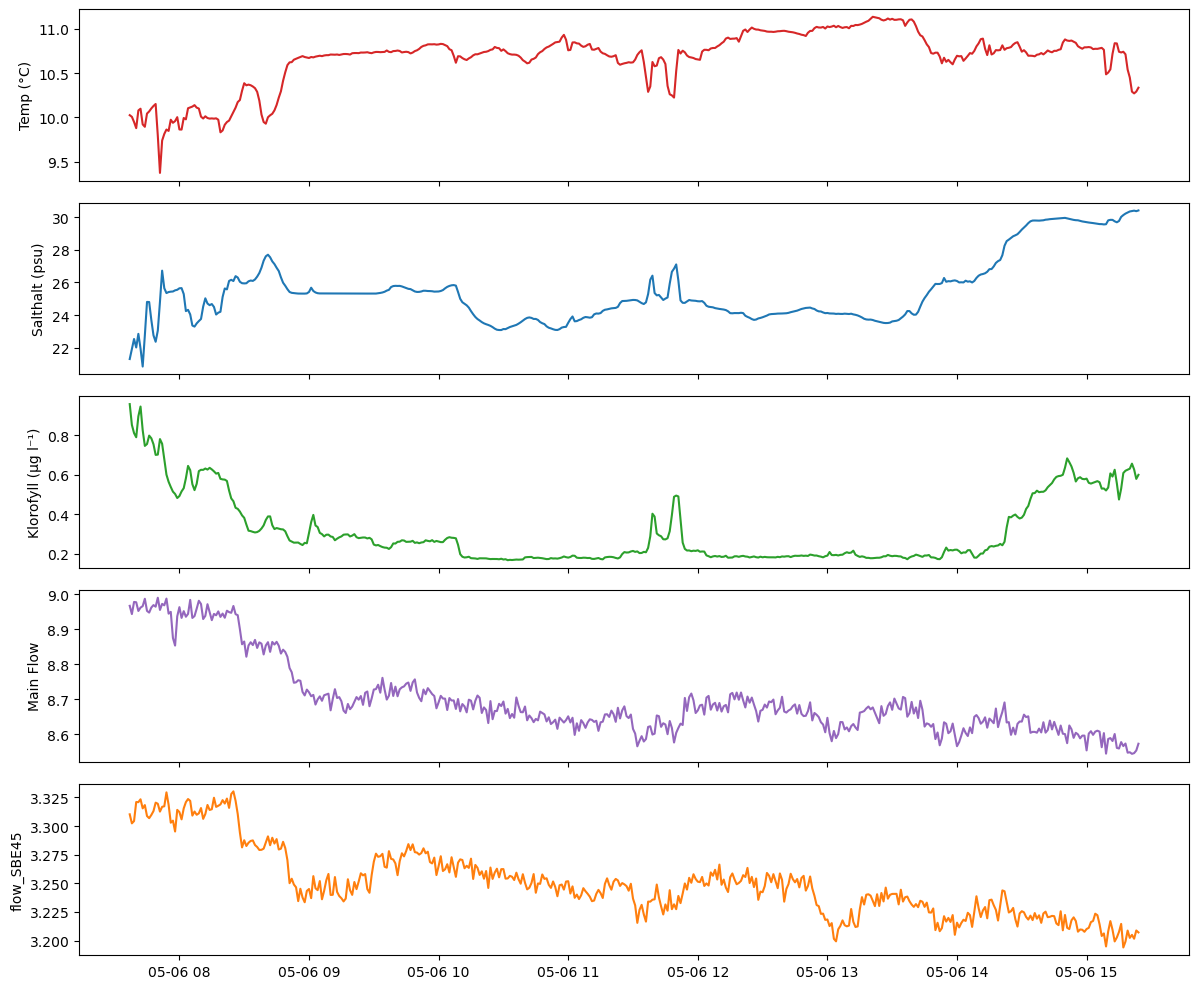

In [16]:
df = dfs[0]                       # or dfs[1], dfs[2] …

fig, axs = plt.subplots(5, 1, figsize=(12, 10), sharex=True)

axs[0].plot(df['datetime'], df['Temp_in_SBE38'],  color='tab:red')
axs[1].plot(df['datetime'], df['Salinity_SBE45'], color='tab:blue')
axs[2].plot(df['datetime'], df['Chlorophyll'],    color='tab:green')
axs[3].plot(df['datetime'], df['flow_main'],         color='tab:purple')
axs[4].plot(df['datetime'], df['flow_SBE45'],      color='tab:orange')

axs[0].set_ylabel('Temp (°C)')
axs[1].set_ylabel('Salthalt (psu)')
axs[2].set_ylabel('Klorofyll (µg l⁻¹)')
axs[3].set_ylabel('Main Flow')
axs[4].set_ylabel('flow_SBE45')

plt.tight_layout()
plt.show()
